In [ ]:
import numpy as np

In [80]:
# Lista Python (Comportamento padrão)
lista_precos = [10, 20, 30]
print(f"Lista Python multiplicada: {lista_precos * 2}")

Lista Python multiplicada: [10, 20, 30, 10, 20, 30]


In [81]:

# Array NumPy (Comportamento Matemático)
array_precos = np.array([10, 20, 30])
print(f"Array NumPy multiplicado:  {array_precos * 2}")

Array NumPy multiplicado:  [20 40 60]


In [84]:
lista_caixas = [
    [10, 20, 30],
    [20, 25, 30],
    [15, 15, 15],
    [50, 10, 10],
    [30, 30, 30]
]

In [ ]:

# Matrizes 2D
dimensoes = np.array([
    [10, 20, 30],
    [20, 25, 30],
    [15, 15, 15],
    [50, 10, 10],
    [30, 30, 30],
    [30, 30, 30],
    [30, 30, 30],
    [30, 30, 30],
    [30, 30, 30],
    [30, 30, 30],
])

print("\n--- Matriz de Dimensões (5 cubos x 3 medidas) ---")
print(dimensoes)


--- Matriz de Dimensões (5 cubos x 3 medidas) ---
[[10 20 30]
 [20 25 30]
 [15 15 15]
 [50 10 10]
 [30 30 30]]


In [30]:
dimensoes.shape

(5, 3)

In [31]:
dimensoes.size

15

In [33]:
dimensoes.dtype

dtype('int64')

### - Eixo 0 (Axis 0): Linhas (cubo / caixa). Descer na vertical.

### - Eixo 1 (Axis 1): Colunas (medida). Correr na horizontal.

## Sintaxe: array[linhas, colunas]

In [90]:
# A) Pegar apenas a primeira caixa (Linha 0, Todas as colunas)
primeira_caixa = dimensoes[0, :]
primeira_caixa

array([10, 20, 30])

In [ ]:

# B) Pegar apenas as ALTURAS de todas as caixas (Todas linhas, Coluna 0)
alturas = dimensoes[:, 0]
alturas


array([10, 20, 15, 50, 30])

In [91]:

# C) Pegar as dimensões das duas últimas caixas
ultimas_caixas = dimensoes[-1:, :]
ultimas_caixas

array([[30, 30, 30]])

In [92]:
dimensoes

array([[10, 20, 30],
       [20, 25, 30],
       [15, 15, 15],
       [50, 10, 10],
       [30, 30, 30]])

In [98]:
np.mean(dimensoes[:, 0])  # Alturas

np.float64(25.0)

In [44]:
# ---------------------------------------------------------
# 4. ESTATÍSTICA BÁSICA (Insights Rápidos)
# ---------------------------------------------------------

print("\n--- Estatísticas de Logística ---")
print(f"Maior altura registrada: {dimensoes[:, 0].max()} cm")
print(f"Volume médio (aprox): {np.mean(dimensoes)}") # Média de tudo


--- Estatísticas de Logística ---
Maior altura registrada: 50 cm
Volume médio (aprox): 22.666666666666668


In [101]:

# Média por COLUNA (axis=0 -> "esmaga" as linhas)
medias_por_medida = dimensoes.mean(axis=0)
medias_por_medida

array([25., 20., 23.])

In [103]:

print(f"Desvio Padrão das Larguras: {np.std(dimensoes[:, 0])}") # Desvio padrão da coluna 1 (Larguras)

Desvio Padrão das Larguras: 14.142135623730951


In [47]:
print(f"Desvio Padrão por coluna: {dimensoes.std(axis=0)}") # Desvio padrão por coluna
print(f"Desvio Padrão por linha: {dimensoes.std(axis=1)}") # Desvio padrão por linha


Desvio Padrão por coluna: [14.14213562  7.07106781  8.71779789]
Desvio Padrão por linha: [ 8.16496581  4.0824829   0.         18.85618083  0.        ]


In [ ]:
import time

# ---------------------------------------------------------
# SIMULAÇÃO DE BIG DATA
# ---------------------------------------------------------
n_transacoes = 10_000_000 # 10 Milhões

# Criando dados aleatórios: Preços entre R$ 100 e R$ 1000
dados_numpy = np.random.uniform(100, 1000, n_transacoes)
dados_lista = list(dados_numpy) # Cópia em formato de lista pura


In [104]:
print(f"Processando {n_transacoes} transações...")

# ---------------------------------------------------------
# RODADA 1: O JEITO "LENTO" (Loop Python puro)
# ---------------------------------------------------------
inicio = time.time()
imposto_lista = []


for preco in dados_lista:
    imposto_lista.append(preco * 1.15) # 15% de imposto


fim = time.time()

tempo_lista = fim - inicio
print(f"Tempo com Loop Python (Listas): {tempo_lista:.4f} segundos")


Processando 10000000 transações...
Tempo com Loop Python (Listas): 0.7963 segundos


In [105]:
# ---------------------------------------------------------
# RODADA 2: O JEITO "RÁPIDO" (Vetorização NumPy)
# ---------------------------------------------------------
inicio = time.time()
# Aqui a mágica acontece: não escrevemos 'for'. Multiplicamos o array inteiro.
imposto_numpy = dados_numpy * 1.15 
fim = time.time()

tempo_numpy = fim - inicio
print(f"Tempo com Vetorização NumPy:    {tempo_numpy:.4f} segundos")

Tempo com Vetorização NumPy:    0.0301 segundos


In [106]:
vezes_mais_rapido = tempo_lista / tempo_numpy
print(f"\nCONCLUSÃO: O NumPy foi {vezes_mais_rapido:.1f}x mais rápido!")


CONCLUSÃO: O NumPy foi 26.5x mais rápido!


## Teste big data 
## **Cuidado** Não testar ou executar com pouca RAM


In [107]:
import pandas as pd

df_base = pd.read_csv("../Aula 6/vendas_varejo.csv")
# EXPANSÃO: Vamos repetir essas 5 linhas 60.000 vezes para ter 300.000 registros
N_REPETICOES = 6000
df_big = pd.concat([df_base] * N_REPETICOES, ignore_index=True)

In [13]:
%%time
df_big.count()

CPU times: user 337 ms, sys: 24.4 ms, total: 362 ms
Wall time: 361 ms


Data                   6000000
Cidade                 6000000
Produto                6000000
Qtd_Venda              6000000
Preco_Unitario         6000000
Desconto_Percentual    6000000
Total_Venda            6000000
Mes                    6000000
dtype: int64

In [ ]:
# ---------------------------------------------------------
# O JEITO "LENTO" (Iteração Pandas - O Vilão)
# ---------------------------------------------------------
# Cenário: Muitos alunos tentam fazer "for row in df" como se fosse uma lista.
# Isso mata a performance do Pandas.

def calcular_frete_lento(df):
    fretes = []
    # iterrows é notoriamente lento pois transforma cada linha em uma Série individual
    for index, row in df.iterrows():
        if row['Cidade'] == 'Curitiba':
            frete = 15.00 # Hub Local
        elif row['Produto'] == 'Tablet':
            frete = 25.00 # Taxa de Fragilidade
        elif row['Preco_Unitario'] > 3000:
            frete = row['Preco_Unitario'] * 0.02 # Seguro de valor alto
        else:
            frete = 20.00 # Frete Padrão
        fretes.append(frete)
    return fretes

print("⏳ Iniciando cálculo com Pandas iterativo (Pode esperar um café...)...")
start_time = time.time()

# --- AQUI É ONDE VAI DEMORAR ---
df_big['Frete_Calculado'] = calcular_frete_lento(df_big) 

end_time = time.time()
tempo_pandas = end_time - start_time
print(f"Tempo Pandas (Iterativo): {tempo_pandas:.2f} segundos")

⏳ Iniciando cálculo com Pandas iterativo (Pode esperar um café...)...
❌ Tempo Pandas (Iterativo): 60.97 segundos


In [113]:
# ---------------------------------------------------------
# O JEITO "RÁPIDO" (NumPy)
# ---------------------------------------------------------
# Cenário: Usando vetores e np.select (condicional vetorizada)

print("\nIniciando cálculo com NumPy...")
start_time = time.time()

# Convertendo colunas para arrays NumPy (O segredo da velocidade)
cidades = df_big['Cidade'].values
produtos = df_big['Produto'].values
precos = df_big['Preco_Unitario'].values

# Definindo as condições (Máscaras Booleanas)
condicoes = [
    (cidades == 'Curitiba'),          # Condição 1
    (produtos == 'Tablet'),           # Condição 2
    (precos > 3000)                   # Condição 3
]

# Definindo os resultados para cada c ondição
escolhas = [
    15.00,                            # Resultado 1
    25.00,                            # Resultado 2
    precos * 0.02                     # Resultado 3 (Cálculo vetorial)
]

# np.select aplica a lógica como um "If/Else" massivo e paralelo
# default=20.00 é o "else" final
df_big['Frete_NumPy'] = np.select(condicoes, escolhas, default=20.00)

end_time = time.time()
tempo_numpy = end_time - start_time
print(f"Tempo NumPy: {tempo_numpy:.4f} segundos")


🚀 Iniciando cálculo com NumPy...
✅ Tempo NumPy: 0.1175 segundos


In [9]:
# ---------------------------------------------------------
# O JEITO "LENTO" (Iteração Pandas - O Vilão)
# ---------------------------------------------------------
# Cenário: Muitos alunos tentam fazer "for row in df" como se fosse uma lista.
# Isso mata a performance do Pandas.

def calcular_frete_lento(df):
    fretes = []
    # iterrows é notoriamente lento pois transforma cada linha em uma Série individual
    for index, row in df.iterrows():
        if row['Cidade'] == 'Curitiba':
            frete = 15.00 # Hub Local
        elif row['Produto'] == 'Tablet':
            frete = 25.00 # Taxa de Fragilidade
        elif row['Preco_Unitario'] > 3000:
            frete = row['Preco_Unitario'] * 0.02 # Seguro de valor alto
        else:
            frete = 20.00 # Frete Padrão
        fretes.append(frete)
    return fretes

print("Iniciando cálculo com Pandas iterativo (Pode esperar um café...)...")
start_time = time.time()

# --- AQUI É ONDE VAI DEMORAR ---
df_big['Frete_Calculado'] = calcular_frete_lento(df_big) 

end_time = time.time()
tempo_pandas = end_time - start_time
print(f"Tempo Pandas (Iterativo): {tempo_pandas:.2f} segundos")

⏳ Iniciando cálculo com Pandas iterativo (Pode esperar um café...)...


KeyboardInterrupt: 

In [111]:
precos = df_big['Preco_Unitario'].values

In [112]:
precos * 0.02

array([18.798 , 57.1564, 56.0036, ..., 25.972 , 61.2978, 93.1054],
      shape=(6000000,))

In [ ]:
# ---------------------------------------------------------
# O JEITO "RÁPIDO" (NumPy)
# ---------------------------------------------------------
# Cenário: Usando vetores e np.select (condicional vetorizada)

print("\nIniciando cálculo com NumPy...")
start_time = time.time()

# Convertendo colunas para arrays NumPy (O segredo da velocidade)
cidades = df_big['Cidade'].values
produtos = df_big['Produto'].values
precos = df_big['Preco_Unitario'].values

# Definindo as condições (Máscaras Booleanas)
condicoes = [
    (cidades == 'Curitiba'),          # Condição 1
    (produtos == 'Tablet'),           # Condição 2
    (precos > 3000),                  # Condição 3
]

# Definindo os resultados para cada c ondição
escolhas = [
    15.00,                            # Resultado 1
    25.00,                            # Resultado 2
    precos * 0.02                     # Resultado 3 (Cálculo vetorial)
]

# np.select aplica a lógica como um "If/Else" massivo e paralelo
# default=20.00 é o "else" final
df_big['Frete_NumPy'] = np.select(condicoes, escolhas, default=20.0)
end_time = time.time()
tempo_numpy = end_time - start_time
print(f"Tempo NumPy: {tempo_numpy:.4f} segundos")


🚀 Iniciando cálculo com NumPy...
✅ Tempo NumPy: 2.0263 segundos


# Comandos úteis

In [20]:
# Extraindo as colunas para arrays NumPy (Zero cópia, muito rápido)
arr_vendas = df_big['Total_Venda'].values
arr_qtd = df_big['Qtd_Venda'].values
arr_precos = df_big['Preco_Unitario'].values
arr_cidades = df_big['Cidade'].values

In [21]:
print("--- ANÁLISE DE PREÇOS (NumPy) ---")
print(f"Média de Preço:      R$ {np.mean(arr_precos):.2f}")
print(f"Mediana (O fiel):    R$ {np.median(arr_precos):.2f}")
print(f"Desvio Padrão:       R$ {np.std(arr_precos):.2f}") # Variação dos dados
print(f"Preço Mínimo:        R$ {np.min(arr_precos):.2f}")
print(f"Preço Máximo:        R$ {np.max(arr_precos):.2f}")

--- ANÁLISE DE PREÇOS (NumPy) ---
Média de Preço:      R$ 2600.64
Mediana (O fiel):    R$ 2619.03
Desvio Padrão:       R$ 1385.24
Preço Mínimo:        R$ 200.06
Preço Máximo:        R$ 4994.68


In [22]:
print("\n--- ANÁLISE DE PERCENTIS (Cortes de Negócio) ---")
# 90º percentil = O valor que separa os top 10% mais caros do resto
p90 = np.percentile(arr_vendas, 90)
print(f"90% das vendas foram abaixo de: R$ {p90:.2f}")

# 25º percentil = O primeiro quartil (vendas baixas)
p25 = np.percentile(arr_vendas, 25)
print(f"25% das vendas foram abaixo de: R$ {p25:.2f}")


--- ANÁLISE DE PERCENTIS (Cortes de Negócio) ---
90% das vendas foram abaixo de: R$ 26475.86
25% das vendas foram abaixo de: R$ 4231.85


In [ ]:
print("\n--- CATEGORIZAÇÃO RÁPIDA (np.where) ---")

# Sintaxe: np.where(condição, valor_se_verdadeiro, valor_se_falso)
# Vamos classificar as vendas em "High Ticket" (> 20.000) e "Standard"
classificacao = np.where(arr_vendas > 20000, 'High Ticket', 'Standard')

# VERIFICANDO O RESULTADO (O que faltou antes)
print("=== AMOSTRA DOS RESULTADOS (Primeiros 10 clientes) ===")
print(classificacao[:10]) # Mostra os 10 primeiros para provar que funcionou

# RESUMO (Contagem)
unicos, contagem = np.unique(classificacao, return_counts=True)
print("\n=== CONTAGEM TOTAL ===")
for categoria, qtd in zip(unicos, contagem):
    print(f"{categoria}: {qtd} pedidos")

=== AMOSTRA DOS RESULTADOS (Primeiros 10 clientes) ===
['Standard' 'High Ticket' 'High Ticket' 'High Ticket' 'Standard'
 'Standard' 'Standard' 'Standard' 'Standard' 'Standard']

=== CONTAGEM TOTAL ===
High Ticket: 1248000 pedidos
Standard: 4752000 pedidos


In [64]:
print("\n--- TRATAMENTO MATEMÁTICO ---")
# Arredondamento massivo (ex: tirar casas decimais do frete)
frete_limpo = np.round(df_big['Frete_Calculado'].values, 2)
print(f"Fretes arredondados (Amostra): {frete_limpo[:5]}")


--- TRATAMENTO MATEMÁTICO ---
Fretes arredondados (Amostra): [15.   25.   25.   25.   84.03]


In [61]:
display(arr_vendas[:5])
# Logaritmo (Muito usado em Data Science para 'espremer' valores muito altos)
# Ajuda a visualizar melhor quando tem salários de 1.000 e 1.000.000 no mesmo gráfico
log_vendas = np.log(arr_vendas)
display(log_vendas[:5])

array([ 6250.335 , 24434.361 , 22681.458 , 29507.0445,  8403.04  ])

array([ 8.74039034, 10.10374566, 10.02930304, 10.29238431,  9.03634882])

array([[<Axes: title={'center': 'vendas_sem_log'}>,
        <Axes: title={'center': 'vendas_com_log'}>]], dtype=object)

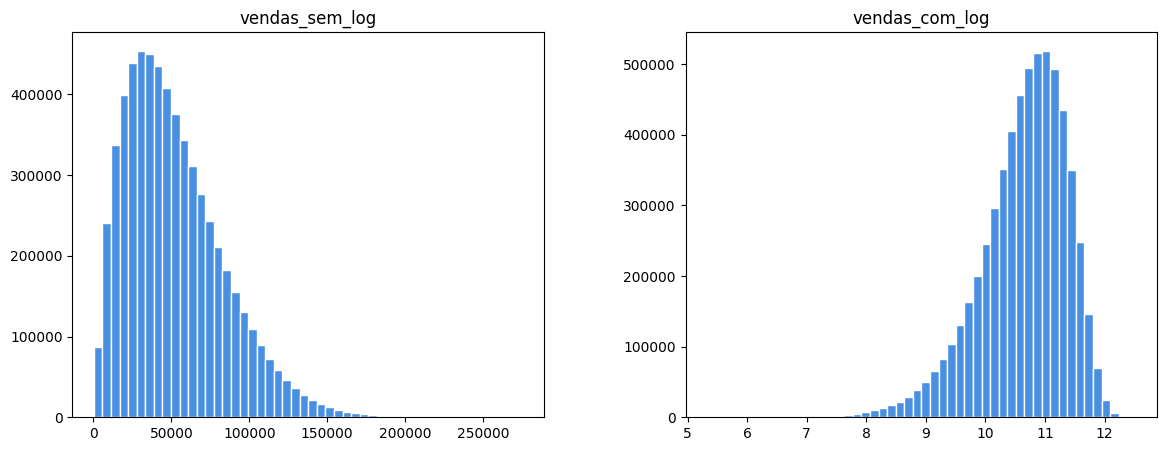

In [78]:
import pandas as pd
import numpy as np

# 1. RECUPERANDO OS DADOS E ADICIONANDO "VIDA REAL" (Ruído)
# O arr_vendas original tem valores fixos. Vamos adicionar uma variação aleatória
# para simular que cada venda teve um valor ligeiramente diferente.
np.random.seed(72)
ruido = np.random.normal(0, 50000, size=len(arr_vendas)) # Variação de +/- 5000
vendas_simuladas_ruido = arr_vendas + np.abs(ruido) # Garantindo que seja positivo

# Criando o DataFrame de plotagem
vendas_pandas = pd.DataFrame({'vendas_sem_log': vendas_simuladas_ruido})

vendas_pandas['vendas_com_log'] = np.log(vendas_pandas['vendas_sem_log'])


vendas_pandas.hist(
    layout=(1, 2), 
    figsize=(14, 5), 
    bins=50,  
    color='#4a90e2', 
    edgecolor='white',
    grid=False
)

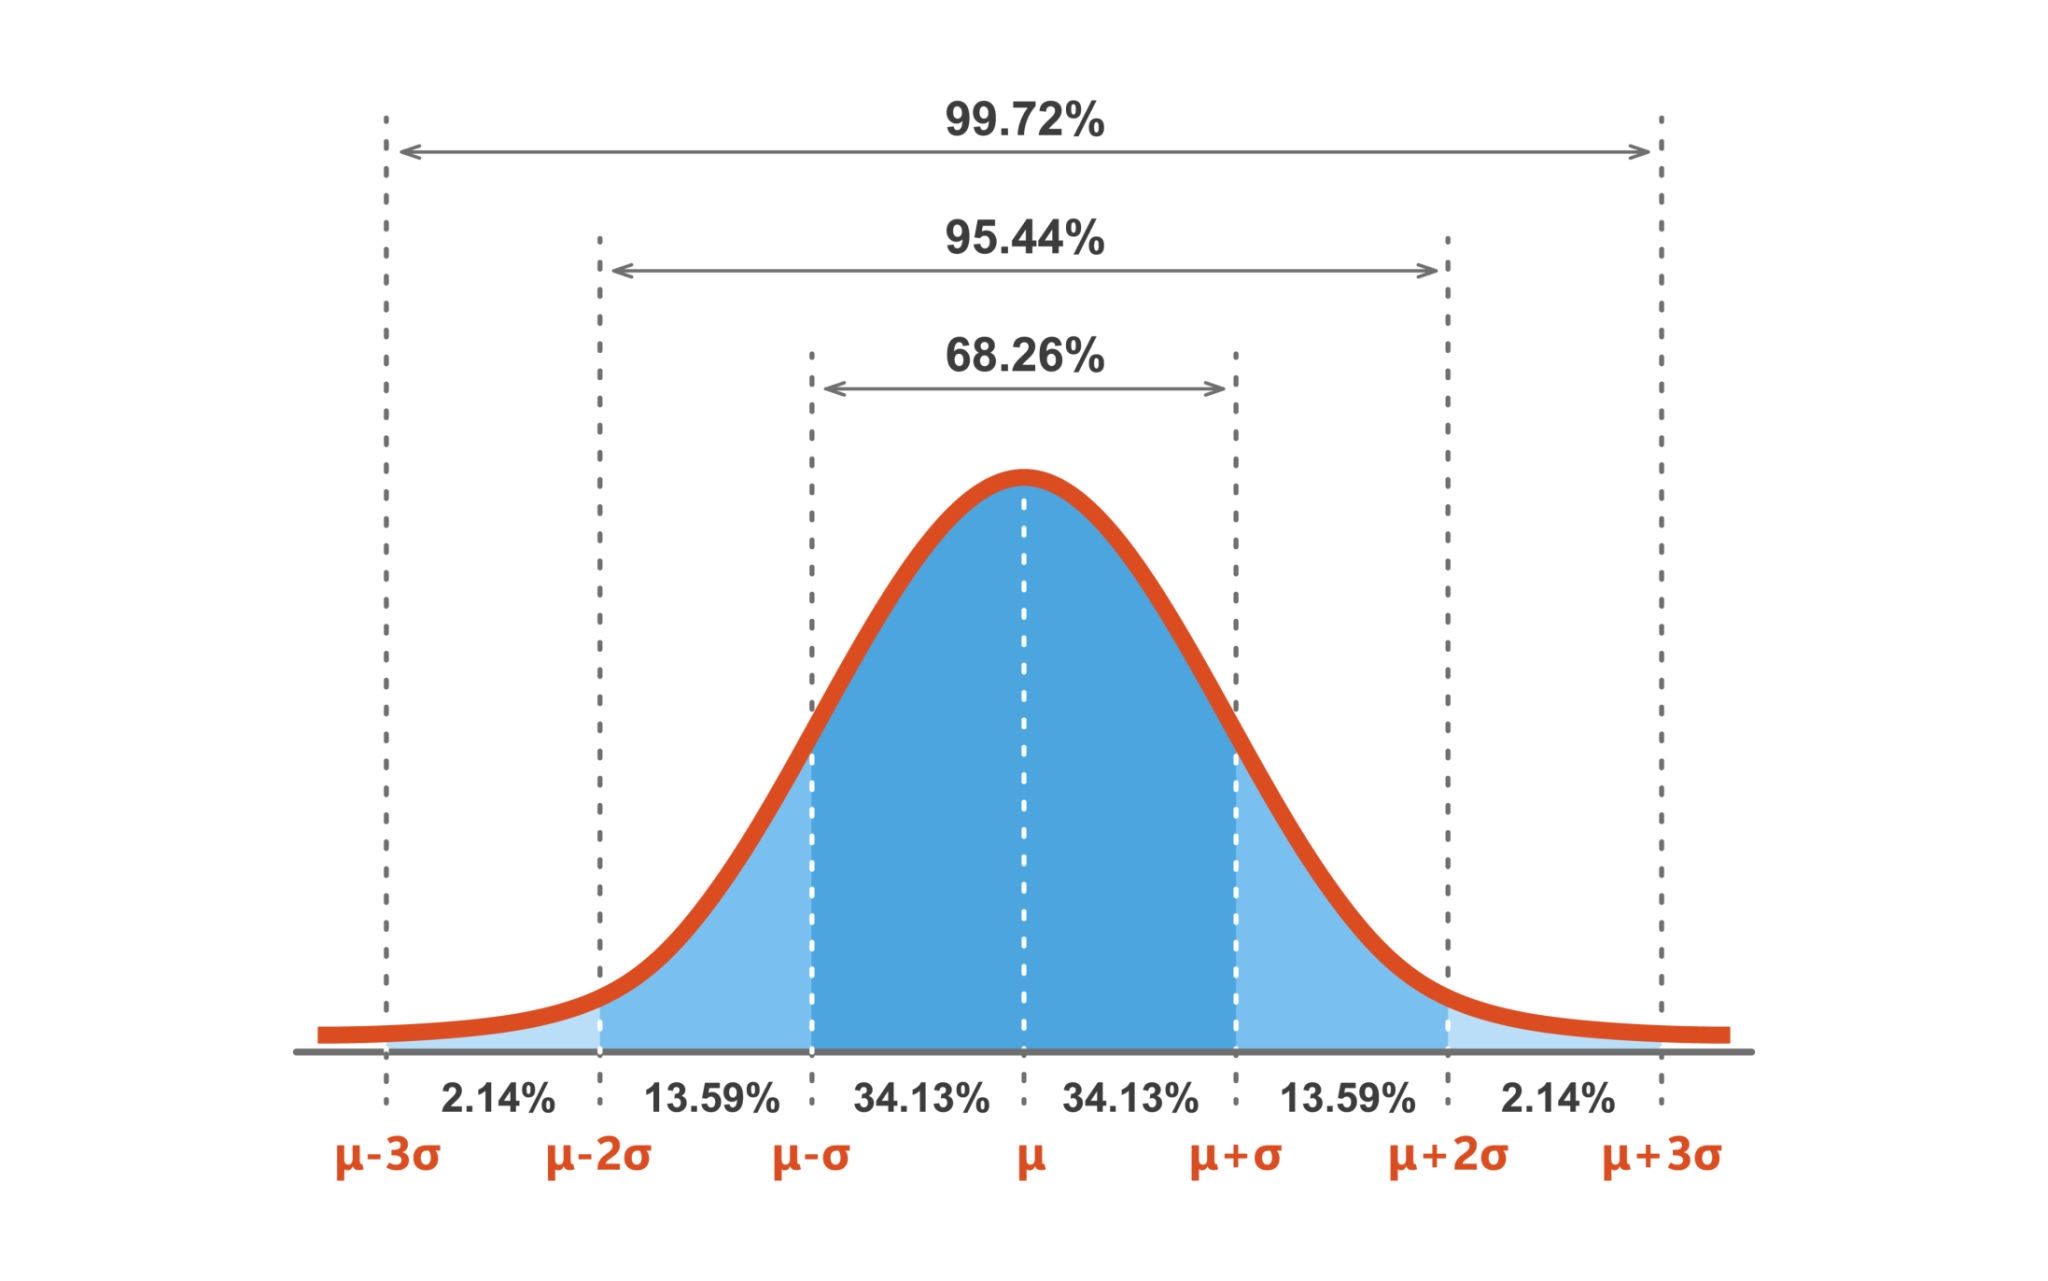